In [0]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import PIL.ImageOps    
from PIL import Image
import numpy as np
import itertools
import math
import sys
import os
from google.colab import drive
from scipy.spatial.distance import squareform

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from os import listdir, walk, rename
from os.path import isfile, join
#from PIL import Image
def getAllFilesInDirectory(directoryPath: str):

      r=[]
      for i in range(1,98):
        for f in listdir(directoryPath):
          #print(f)
          if str(i)==f.replace(".jpg",""):
            r.append(f)
      #print(r)
      return r

In [0]:
import os
print(os.getcwd())
os.chdir("gdrive")
os.chdir("My Drive")
os.chdir("cd")

/content


In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import Model
import numpy as np
from os import listdir, walk, rename
from os.path import isfile, join
from PIL import Image
import itertools
import re

def predict(img_path: str, model: Model):
  
  img = image.load_img(img_path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return model.predict(x)

def findDifference(f1, f2):
    return np.linalg.norm(f1 - f2)


def get_diff_matrix(feature_vectors):
    keys = [k for k, v in feature_vectors.items()]

    imglist = list(x[0] for x in feature_vectors.items())
    labels = []
    for img in imglist:
        labels.append(re.sub("images/", "", img))

    possible_combinations = list(itertools.combinations(keys, 2))

    mat = np.zeros((len(keys), len(keys)))

    for k, v in possible_combinations:
        diff = findDifference(feature_vectors[k], feature_vectors[v])
        x = imglist.index(k)
        y = imglist.index(v)
        mat[x][y] = diff
        mat[y][x] = diff
    return labels, mat


def get_difference_matrix():
    feature_vectors: dict = {}
    model = ResNet50(weights="imagenet")
    for img_path in getAllFilesInDirectory("images"):
        feature_vectors[img_path] = predict("images/"+img_path, model)[0]

    return get_diff_matrix(feature_vectors)


labels, matt = get_difference_matrix()




Using TensorFlow backend.
W0716 06:40:20.123200 139814683408256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 06:40:20.140181 139814683408256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 06:40:20.148486 139814683408256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0716 06:40:20.178120 139814683408256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session inste

In [0]:
mat_cache=matt
print(labels)
print(mat_cache)
print(np.max(mat_cache))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97']
[[0.         0.98678875 0.9838686  ... 1.05384588 0.28356108 1.23851955]
 [0.98678875 0.         0.3273631  ... 0.50776327 0.72583914 0.75098693]
 [0.9838686  0.3273631  0.         ... 0.4816165  0.71699166 0.64103383]
 ...
 [1.05384588 0.50776327 0.4816165  ... 0.         0.80706561 0.80600929]
 [0.28356108 0.72583914 0.71699166 ... 0.80706561 0.         1.00713837]
 [1.23851955 0.75098693 0.64103383 ... 0.80600929 1.0071

In [0]:
l_txt=open("labels.txt","w")
for label in labels:
  l_txt.write("\n".join(label))
m_txt=open("matrix.txt","w")
np.savetxt("matrix.txt",mat_cache)

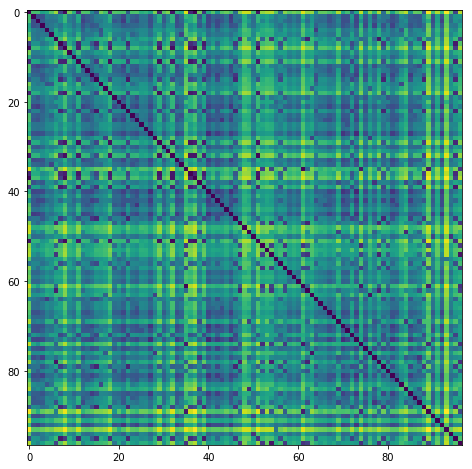

In [0]:
plt.figure(figsize=(8,8))
mat_cache=mat_cache/np.max(mat_cache)
plt.imshow(mat_cache)
plt.show()

In [0]:
import numpy as np

labels2=open("labels.txt",'r')
labels2=labels2.read().split('\n')

mat2=np.loadtxt('sim.txt')


mat=mat_cache.copy()

alpha=1  #color*(1-alpha)+figure*alpha
mat=np.array(mat)
mat=(mat-np.min(mat))/(np.max(mat)-np.min(mat))
mat2=(mat2-np.min(mat2))/(np.max(mat2)-np.min(mat2))
labels_=labels
labels2_=labels2

mat_new=mat_cache.copy()

print(np.sum(mat_new==mat))

i=0
for name2 in labels2:
  for name1 in labels:
    if name2==name1.replace(".jpg",""):
      for name2_ in labels2_:
        for name1_ in labels_:
          if name2_==name1_.replace(".jpg",""):
            i=i+1
            mat_new[labels.index(name1),labels.index(name1_)]=mat_new[labels.index(name1),labels.index(name1_)]*alpha+mat2[labels2.index(name2),labels2_.index(name2_)]*(1-alpha)
            mat_new[labels.index(name1_),labels.index(name1)]=mat_new[labels.index(name1_),labels.index(name1)]*alpha+mat2[labels2.index(name2_),labels2_.index(name2)]*(1-alpha)

print(i)
print(np.sum(mat_new==mat))

9409
9409
9409


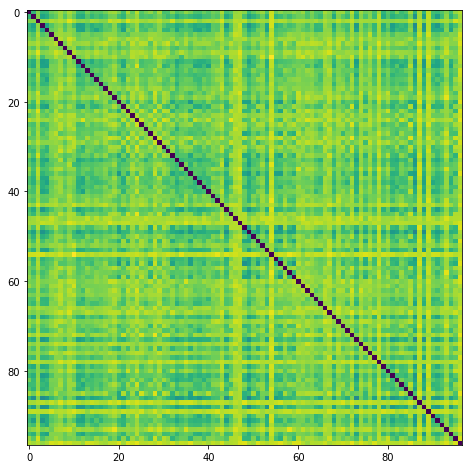

97


In [0]:
plt.figure(figsize=(8,8))
plt.imshow(mat_new)
plt.show()

print(np.sum(mat_new==mat_cache))

In [0]:
dismat=mat_new
threshold = 0.2 
adjmat = dismat.copy()
np.fill_diagonal(adjmat, np.min(dismat)) 
adjmat = adjmat.reshape((-1,))
adjmat[adjmat > threshold] = 0
print("{} out of {} values set to zero".format(len(adjmat[adjmat == 0]), len(adjmat)))
adjmat = adjmat.reshape(dismat.shape)

9025 out of 9409 values set to zero


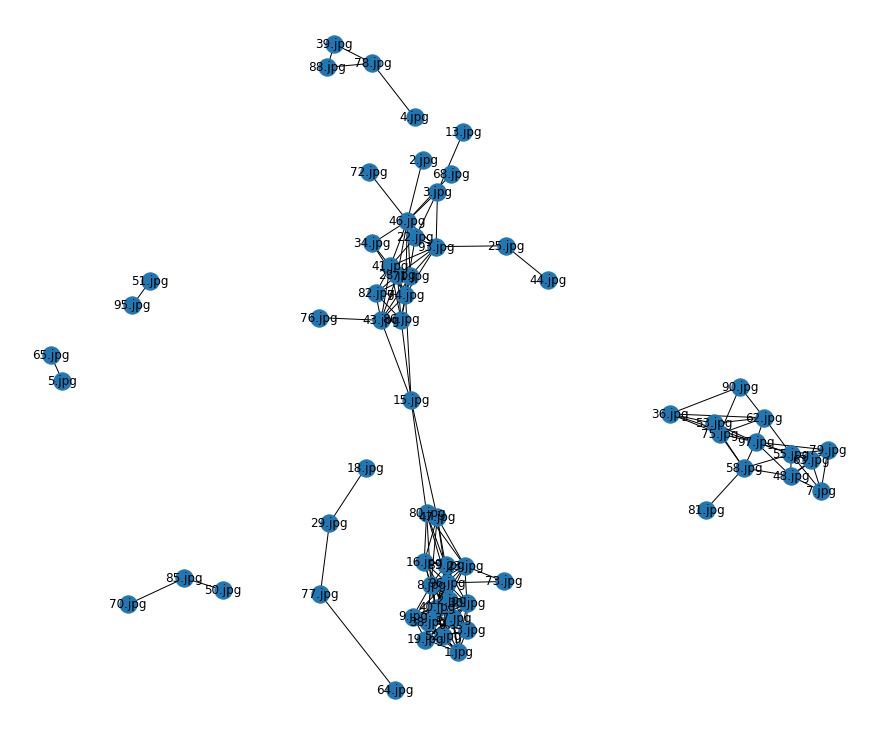

In [0]:
def make_graph(sim, labels=None):
    G = nx.Graph()
    for (i, j) in [(i, j) for i in range(sim.shape[0]) for j in range(sim.shape[1]) if i != j and sim[i,j] != 0]:
        if labels == None:
            G.add_edge(i, j, weight=sim[i,j])
        else:
            G.add_edge(labels[i], labels[j], weight=sim[i,j])
    return G

G = make_graph(adjmat, labels=labels)
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

In [0]:
class Config():
    colors = ['aquamarine', 'bisque', 'blanchedalmond', 'blueviolet', 'brown',
              'burlywood', 'cadetblue', 'chartreuse','chocolate', 'coral',
              'cornflowerblue', 'cornsilk', 'crimson', 'darkblue', 'darkcyan',
              'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki',
              'darkmagenta', 'darkolivegreen', 'darkorange', 'darkslateblue',
              'darkorchid', 'darkred', 'darksalmon', 'darkseagreen',
              'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet',
              'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue',
              'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro',
              'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow',
              'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory']

from networkx.algorithms.community.centrality import girvan_newman
from IPython.display import display
from PIL import Image
comp = girvan_newman(G)

max_shown = 3
shown_count = 1
possibilities = []

found_communities=[]
for communities in itertools.islice(comp, max_shown):
    found_communities.append(communities)
    print("Possibility", shown_count, ": ", end='')
    print(communities)
    possibilities.append(communities)
    color_map = ["" for x in range(len(G))]
    color = 0
    for c in communities:
        indices = [i for i, x in enumerate(G.nodes) if x in c]
        for i in indices:
            color_map[i] = Config.colors[color]
        color += 1
    shown_count += 1
    plt.figure(figsize=(6, 5))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, node_color=color_map, with_labels=True)
    plt.show()
    
    for nodes in communities:
      print("Community")
      list_im=[]
      for node in nodes:
        list_im.append('images/'+node)

      
      new_im=Image.new('RGB',(182*len(list_im),268))
      i=0
      for elem in list_im:
          im=Image.open(elem)
          new_im.paste(im,(i,0))
          i=i+182
      display(new_im)
        
        

Output hidden; open in https://colab.research.google.com to view.

In [0]:
print(found_communities)


[({'OnlyTheLonely.jpg', '944835.jpg', 'Spiderman2.jpg', 'FridayThe13th.jpg', 'KM31.jpg', 'Venom.jpg', '41wJe1rzQZL.jpg', '2325002.jpg', '1587877.jpg', 'CaptainMarvel.jpg', 'BloodLine.jpg', 'TheEye.jpg', 'puss in boots.jpg', 'Unforgettable.jpg', 'HottlesInSpace.jpg', 'FlyAwayHome.jpg', 'DoodEnd.jpg', '67800.jpg', 'Aladdin.jpg', 'TheIdesOfMarch.jpg', '999913.jpg', 'Warcraft.jpg', 'Chucky.jpg', 'Requiem.jpg', 'SexDrive.jpg', '1458175.jpg', 'BenjaminButton.jpg', 'BluePlanet2.jpg', '399295.jpg', 'SYRIANA(2005).jpg', 'CandyMan.jpg', '478724.jpg', 'KingPin.jpg', '995039.jpg', 'the hitcher.jpg', 'u=3036488533,2264184910&fm=15&gp=0.jpg', '408345.jpg', 'MakingVCOCO.jpg', 'CorporateAffairs.jpg', '31047.jpg', '1320253.jpg', 'TheProdigy.jpg', 'Frankenstein.jpg', '1129442.jpg', 'VerbrechenVerfuhrt.jpg', '396652.jpg', 'u=3549291401,1142039725&fm=26&gp=0.jpg'}, {'106918.jpg', 'CandyMan2.jpg', 'Greta.jpg', '814022.jpg', '11688535f20e9ab69256401563169304.jpg', '19109.jpg', 'LoveStory.jpg'}), ({'OnlyTheL